# Import necessary libraries.

To install facebook prophet, you will need to pip install pystan and fbprophet.
It can best be downloaded on windows from anaconda.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings 
warnings.simplefilter('ignore')
import itertools
import matplotlib
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from fbprophet import Prophet

# Load the data.
To load the data, we are to use the imported pandas library with alias pd, and the data we are loading is a csv file gotten from kaggle platform which is based on the daily weather conditions in delhi.

In [2]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('DailyDelhiClimateTest.csv')

In [4]:
df = pd.concat([df_train,df_test], axis = 0)

In [5]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


### Convert the date column to a date time data type and drop the columns not needed.
Since we are going to be predicting for the daily temperature,we will need to first convert the date column to date time format using pandas, then drop other columns except the date and the meantemp columns.We are droping it because we are only predicting for the temperature, and the way time series model works, you only have you time and y columns, except if you wants to make multiple predictions where you loop through. THEN YOU MUST RENAME THE COLUMN AS "ds" and "y" else Prophet won't understand how to place the data

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1576 non-null   datetime64[ns]
 1   meantemp      1576 non-null   float64       
 2   humidity      1576 non-null   float64       
 3   wind_speed    1576 non-null   float64       
 4   meanpressure  1576 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 73.9 KB


In [7]:
cols_to_drop = ['humidity','wind_speed','meanpressure']

In [8]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [9]:
df['date'].min(),df['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-04-24 00:00:00'))

In [10]:
df.columns = ['ds','y']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 1575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1576 non-null   datetime64[ns]
 1   y       1576 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.9 KB


# Now we fit data into Prophet and make future forecast.
After fitting, we can make forecast in a pandas dataframe format, the parameter "periods" on the .make_future_dataframe is used to pass the number of future predictions we want to make, and the "freq" is for passing the frequency, where the 'D' here reps
represents daily.

In [12]:
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 1 threads.


In [13]:
future = m.make_future_dataframe(periods=800,freq='D')


In [14]:
forecast = m.predict(future)

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,12.918841,7.856942,15.716217,12.918841,12.918841,-0.997711,-0.997711,-0.997711,11.749085,...,0.033566,0.033566,0.033566,-12.780361,-12.780361,-12.780361,0.0,0.0,0.0,11.921130
1,2013-01-02,12.919277,8.322408,16.142445,12.919277,12.919277,-0.857176,-0.857176,-0.857176,11.749085,...,0.149778,0.149778,0.149778,-12.756039,-12.756039,-12.756039,0.0,0.0,0.0,12.062101
2,2013-01-03,12.919713,7.996231,16.401452,12.919713,12.919713,-0.877060,-0.877060,-0.877060,11.749085,...,0.091752,0.091752,0.091752,-12.717897,-12.717897,-12.717897,0.0,0.0,0.0,12.042653
3,2013-01-04,12.920149,8.176714,15.977190,12.920149,12.920149,-0.901460,-0.901460,-0.901460,11.749085,...,0.017513,0.017513,0.017513,-12.668057,-12.668057,-12.668057,0.0,0.0,0.0,12.018689
4,2013-01-05,12.920585,8.260863,16.053558,12.920585,12.920585,-0.965952,-0.965952,-0.965952,11.749085,...,-0.106369,-0.106369,-0.106369,-12.608668,-12.608668,-12.608668,0.0,0.0,0.0,11.954632


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2370,2019-06-29,15.897151,29.532185,39.286963,13.355165,18.718315,18.536513,18.536513,18.536513,11.749085,...,-0.106369,-0.106369,-0.106369,6.893797,6.893797,6.893797,0.0,0.0,0.0,34.433664
2371,2019-06-30,15.897829,29.407412,38.909299,13.352519,18.725928,18.384161,18.384161,18.384161,11.749085,...,-0.176604,-0.176604,-0.176604,6.811680,6.811680,6.811680,0.0,0.0,0.0,34.281990
2372,2019-07-01,15.898507,29.471162,38.902924,13.349873,18.733541,18.474100,18.474100,18.474100,11.749085,...,-0.009635,-0.009635,-0.009635,6.734651,6.734651,6.734651,0.0,0.0,0.0,34.372607
2373,2019-07-02,15.899185,29.580229,39.301372,13.347228,18.741154,18.444746,18.444746,18.444746,11.749085,...,0.033566,0.033566,0.033566,6.662095,6.662095,6.662095,0.0,0.0,0.0,34.343930
2374,2019-07-03,15.899862,29.236558,38.833111,13.344582,18.748767,18.492147,18.492147,18.492147,11.749085,...,0.149778,0.149778,0.149778,6.593285,6.593285,6.593285,0.0,0.0,0.0,34.392009


# Make Plots with the forecast
Here, we make two plots, The first that shows the data points first then only the line at the end is comparing the past time series and the predicted one.

While the one with three sub-plots is showing for other components of the model, which are the trends and other variabilities  yearly, weekly and daily

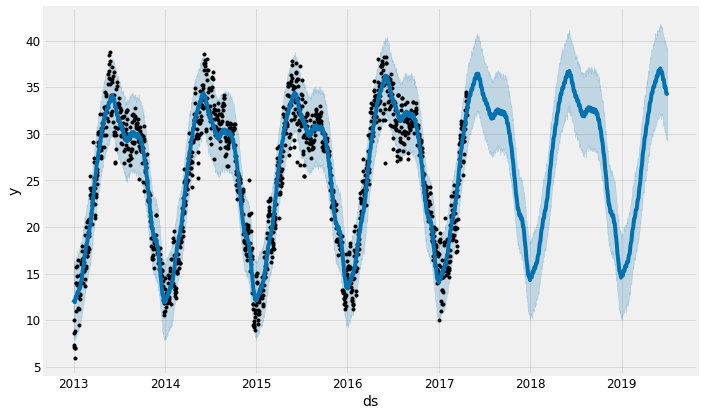

In [17]:
m.plot(forecast)
plt.show()

### Lets explain the chats
The first with the label trends is telling us about the overall movement of the temperature, either it's increasing or decreasing, but it shows the temperature is increasing here, there was even a leap from 2015 till 2016, probably we investigated it might be due to global warming.

The second chat shows its weekly variations which shows peak temperature on Wednesday and lowest on Sundays.

The third Shows for yearly variations which shows peak temperature in mid May and lowest in January.

Then the last chat shows for daily variations, you can see its like recoiling.

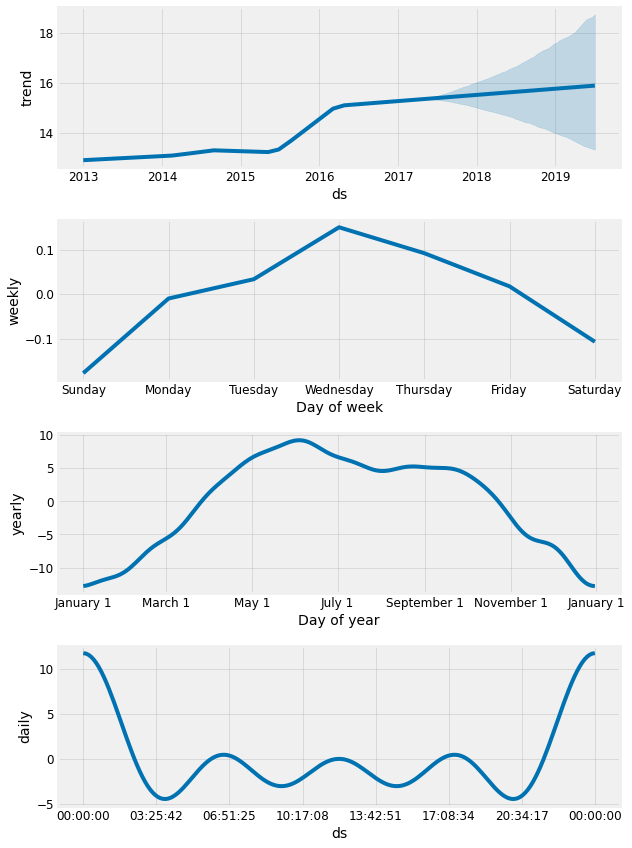

In [18]:
m.plot_components(forecast)
plt.show()